In [ ]:
# import necessary python packages 

import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from datetime import date
import csv
import os
import json
import urllib.request
from datetime import date
import matplotlib.pyplot as plt

# Data Acquisition
Read the data from the crawled csv file and display the dataframe general view

In [ ]:
# Read data from a CSV file into a data frame
df = pd.read_csv('zillow.csv')

# Display the first five rows of the data frame to examine if it is an individual-level data set
print(df.head())

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

                                              h_link  ...      lot
0  https://www.zillow.com/homedetails/34-Joyce-Ln...  ...  10890.0
1  https://www.zillow.com/homedetails/61-Cypress-...  ...  11326.0
2  https://www.zillow.com/homedetails/69-Walter-A...  ...  11326.0
3  https://www.zillow.com/homedetails/6-Park-Ct-P...  ...  11326.0
4  https://www.zillow.com/homedetails/6-Lesley-Ln...  ...  11326.0

[5 rows x 18 columns]
['h_link' 'num_of_bed' 'num_of_bath' 'square' 'price' 'zestimate' 'year'
 'month' 'date' 'town' 'state' 'zipcode' 'house_type' 'year_built'
 'heating' 'cooling' 'parking' 'lot']
(659, 18)


In [ ]:
#show all the attributes' data types
df.dtypes

h_link          object
num_of_bed     float64
num_of_bath    float64
square         float64
price            int64
zestimate      float64
year             int64
month            int64
date             int64
town            object
state           object
zipcode          int64
house_type      object
year_built     float64
heating         object
cooling         object
parking         object
lot            float64
dtype: object

# Data Cleaning
Impute missing / NA values and convert the attribute' data type into properly ones

In [ ]:
#check total counts of missing values of each attribute
df.isnull().sum()

h_link           0
num_of_bed      29
num_of_bath     12
square         267
price            0
zestimate       58
year             0
month            0
date             0
town             0
state            0
zipcode          0
house_type       0
year_built       9
heating         15
cooling         41
parking          0
lot             20
dtype: int64

In [ ]:
# Drop the observations that contain missing dependent variable values
# Placeholder variable is DV
DV = 'price'
df1 = df.copy()
df1 = df1.dropna(subset=[DV])
df1.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6.0,3.0,3299.0,1080000,1096500.0,2021,10,13,Woodbury,NY,11797,Single Family Residence,1967.0,Natural Gas,Central Air,2 Attached Garage spaces,10890.0
1,https://www.zillow.com/homedetails/61-Cypress-...,3.0,2.0,NaN,555000,561800.0,2021,10,21,Bethpage,NY,11714,Single Family Residence,1956.0,Natural Gas,Central Air,1 Attached Garage space,11326.0
2,https://www.zillow.com/homedetails/69-Walter-A...,6.0,4.0,2663.0,875000,NaN,2021,11,15,Hicksville,NY,11801,Single Family Residence,1981.0,Natural Gas,Wall Unit(s),1 Attached Garage space,11326.0
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5.0,3.0,3662.0,1350000,1360000.0,2021,11,10,Plainview,NY,11803,Single Family Residence,2021.0,Natural Gas,Central Air,2 Attached Garage spaces,11326.0
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,NaN,1.5,1592.0,560000,641300.0,2021,11,9,Bethpage,NY,11804,SingleFamily,1957.0,Other,Central,Garage - Attached,11326.0


In [ ]:
df2 = df1.copy()

In [ ]:
#df2['price'] = df2['price'].astype(str).str.replace('$', '').str.replace(',', '')
#df2['price'] = pd.to_numeric(df2['price'], errors='coerce').fillna(df2['price'].median(), inplace=True)
df2['price'] = df2['price'].astype('int64')

In [ ]:
#df2['year_built'] = df2['year_built'].str.replace('Build in ', '')
df2['year_built'] = pd.to_numeric(df2['year_built'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['square'] = df2['square'].str.replace(',', '').str.replace('sqft', '')
df2['square'] = pd.to_numeric(df2['square'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bed'] = df1['num_of_bed'].str.replace('bd', '')
df2['num_of_bed'] = pd.to_numeric(df2['num_of_bed'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['num_of_bath'] = df1['num_of_bath'].str.replace('ba', '')
df2['num_of_bath'] = pd.to_numeric(df2['num_of_bath'], errors='coerce').fillna(0).astype(int)

In [ ]:
#df2['lot'] = df1['lot'].str.replace(',', '').str.replace('sqft', '')
df2['lot'] = pd.to_numeric(df2['lot'], errors='coerce').fillna(0).astype(int)

In [ ]:

#df2['zestimate'] = df2['zestimate'].str.replace('$', '').str.replace(',','')
df2['zestimate'] = pd.to_numeric(df2['zestimate'], errors='coerce').fillna(0).astype(int)

In [ ]:
df2.head()

,h_link,num_of_bed,num_of_bath,square,price,zestimate,year,month,date,town,state,zipcode,house_type,year_built,heating,cooling,parking,lot
0,https://www.zillow.com/homedetails/34-Joyce-Ln...,6,3,3299,1080000,1096500,2021,10,13,Woodbury,NY,11797,Single Family Residence,1967,Natural Gas,Central Air,2 Attached Garage spaces,10890
1,https://www.zillow.com/homedetails/61-Cypress-...,3,2,0,555000,561800,2021,10,21,Bethpage,NY,11714,Single Family Residence,1956,Natural Gas,Central Air,1 Attached Garage space,11326
2,https://www.zillow.com/homedetails/69-Walter-A...,6,4,2663,875000,0,2021,11,15,Hicksville,NY,11801,Single Family Residence,1981,Natural Gas,Wall Unit(s),1 Attached Garage space,11326
3,https://www.zillow.com/homedetails/6-Park-Ct-P...,5,3,3662,1350000,1360000,2021,11,10,Plainview,NY,11803,Single Family Residence,2021,Natural Gas,Central Air,2 Attached Garage spaces,11326
4,https://www.zillow.com/homedetails/6-Lesley-Ln...,0,1,1592,560000,641300,2021,11,9,Bethpage,NY,11804,SingleFamily,1957,Other,Central,Garage - Attached,11326


In [ ]:
df2.dtypes

h_link         object
num_of_bed      int64
num_of_bath     int64
square          int64
price           int64
zestimate       int64
year            int64
month           int64
date            int64
town           object
state          object
zipcode         int64
house_type     object
year_built      int64
heating        object
cooling        object
parking        object
lot             int64
dtype: object

In [ ]:
#seperate numerical variable and categorical variabl
nvar_list = ['num_of_bed', 'num_of_bath', 'square',  'price', 'zestimate', 'year_built', 'lot' ]
cvar_list = ['h_link', 'sold_type', 'month', 'date','year', 'address', 'town', 'state', 'zipcode',  'house_type', 'heating', 'cooling',  'parking' ]

In [ ]:
import seaborn as sns

In [ ]:
df3 = df2.copy()
df3['price'] = (df3['price']-df3['price'].mean())/df3['price'].std()

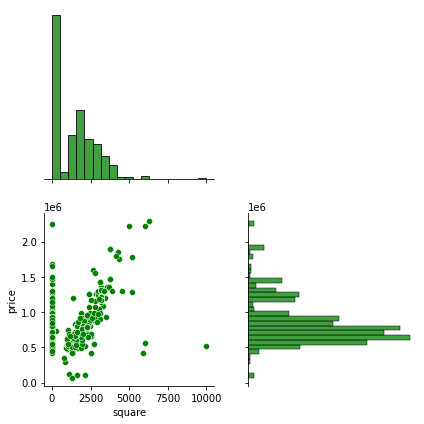

In [ ]:
sns.jointplot(data=df2, x="square", y="price",kind='scatter',ratio=1, color='green')
# show the plot
plt.show()

# Data Exploration
Explore the relationships among independent varialbes and dependent variable

In [ ]:

# importing the required libraries
import matplotlib.pyplot as plt

In [ ]:
df4 = df2.copy()
varlist = ['num_of_bed', 'num_of_bath', 'price']
df4 = df4[varlist]

In [ ]:
df4.head()

,num_of_bed,num_of_bath,price
0,6,3,1080000
1,3,2,555000
2,6,4,875000
3,5,3,1350000
4,0,1,560000


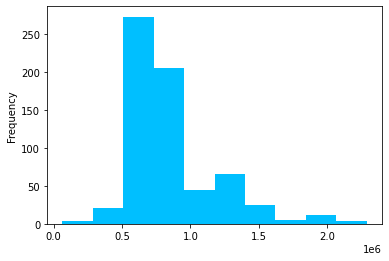

In [ ]:
lines = df4['price'].plot.hist(color = 'deepskyblue')


In [ ]:
df5 = df2.copy()

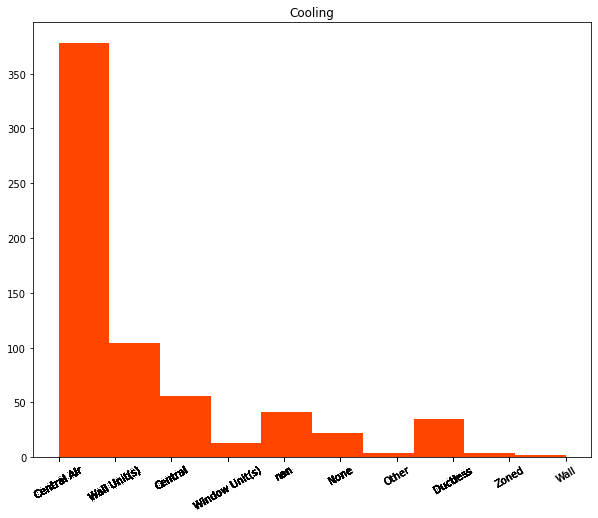

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = df5['cooling'].astype(str)
#x1 = df5['num_of_bed']

plt.figure(figsize=(10, 8))
# plotting first histogram
plt.hist(x, color = 'orangered', label = "num_of_bath")
plt.title('Cooling')   
plt.xticks(x, rotation=30) 

# plotting second histogram
#plt.hist(x1, color = 'gold', label = ['num_of_bed'])

# Showing the plot using plt.show()
plt.show()


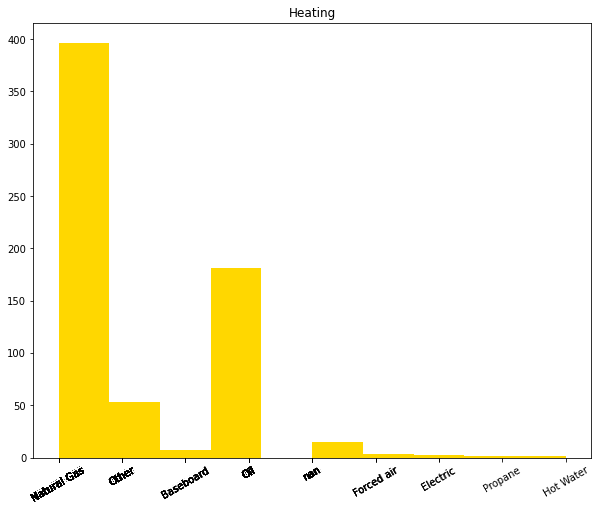

In [ ]:
x1 = df5['heating'].astype(str)
# plotting first histogram
plt.figure(figsize=(10, 8))

plt.hist(x1, color = 'gold', label = ['num_of_bed'])

plt.title('Heating')   
plt.xticks(x1, rotation=30)   

# Showing the plot using plt.show()
plt.show()

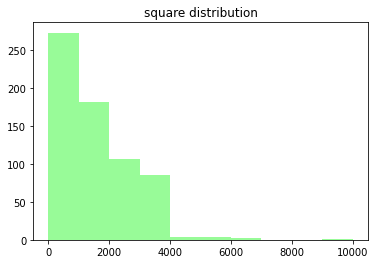

In [ ]:
x1 = df5['square']

# plotting first 
plt.hist(x1, color = 'palegreen', label = ['num_of_bed'])
  
# Showing the plot using plt.show()
plt.title('square distribution')
plt.show()


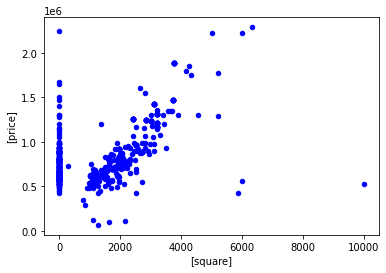

In [ ]:
# Generate a scatterplot 

# Placeholder variables: x_var, y_var. 
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = [ 'square']
y_var = [ 'price']

# Draw the scatterplot
df2.plot.scatter(x=x_var, y=y_var, color = ['blue'], legend=False)

In [ ]:
df3 = df2.copy()
df3 = df3[nvar_list]